#Curso introdutório de Data Science


#Comandos básicos com pandas

In [ ]:
#Importando o pandas
import pandas as pd

#lendo o arquivo csv e colocando em uma variavel
notas = pd.read_csv("ratings.csv")
#pedindo começo do dataset(por padrão imprime os 5 primeiros elementos)
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#extraindo as informações com shape (n° de linhas, n° de colunas)
notas.shape

(100836, 4)

In [ ]:
#alterando o nome das colunas
notas.columns = ["usuarioid", "filmeid", "notas", "momento"]
notas.head()

,usuarioid,filmeid,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#selecionando todos os valores pela coluna nota, retornando sem duplicados em uma lista
notas['notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
#contando os valores de uma coluna
notas['notas'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [ ]:
#calculando a média de todas as notas
notas['notas'].mean()

3.501556983616962

In [ ]:
#acessando informação da coluna de outra maneira
notas.notas

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: notas, Length: 100836, dtype: float64

In [ ]:
#pegando os 5 valores de notas
notas.notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

#Olhando os dados

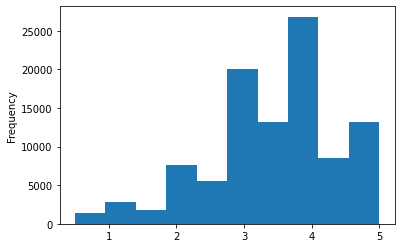

In [ ]:
#Fazendo o uso do plot e transformando em histograma
notas.notas.plot(kind='hist')

In [ ]:
#calculando a mediana
notas.notas.median()

3.5

In [ ]:
#pedindo para descrever os dados
notas.notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


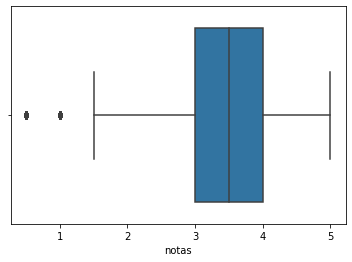

In [ ]:
#importando a biblioteca seaborn
import seaborn as sns
#plotando no formato de caixa
sns.boxplot(notas.notas)

In [ ]:
#carregando os filmes do csv movies
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeid', 'titulo', 'generos']
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando as notas de alguns **filmes**


In [ ]:
#fazendo uma pergunta para saber a quantidade de filme id = 1, selecionando as notas e pegando a media
notas.query("filmeid == 1").notas.mean()

3.9209302325581397

In [ ]:
notas.query("filmeid == 2").notas.mean()

3.4318181818181817

In [ ]:
#agrupando por filmes e tirando a media
medias_por_filme = notas.groupby('filmeid').mean().notas
medias_por_filme.head()

filmeid
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

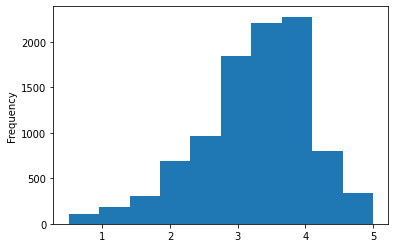

In [ ]:
#plotando a analise
medias_por_filme.plot(kind='hist')

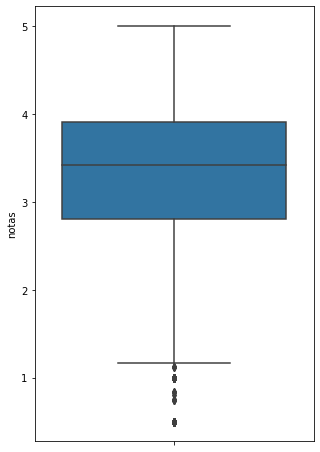

In [ ]:
import matplotlib.pyplot as plt
#fazendo um gráfico usando o seaborn
plt.figure(figsize=(5, 8)) #configurando o tamanho do gráfico
sns.boxplot(y=medias_por_filme) #y= ou x=, define a posição do gráfico

In [ ]:
#descrevendo as médias por filmes
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

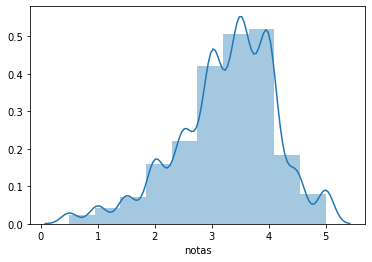

In [ ]:
#criando um gráfico de distribuição com seaborn, atributo bins e para escolher o numero de caixas
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

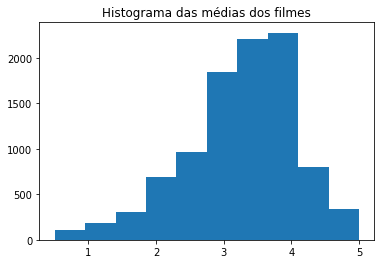

In [ ]:
#importando a biblioteca matplotlib
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

#Analisando um novo dataset pelo **tipo de variaveis**

In [ ]:
#lendo o dataset
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#perguntado quais são as linguas que tem a base
tmdb.original_language.unique()#a coluna original_language, é uma variavel categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Entendendo melhor os tipos de variaveis

In [ ]:
#variavel categorica ordinal
# primeirograu
# segundograu
# terceirograu
#1 grau < 2 grau < 3 grau

In [ ]:
#budget => orcamento => quantitativa continuo

In [ ]:
#quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos
#notas dos movieslens => 0 0.5, 1, 1.5... 5, não tem o 2.7

In [ ]:
#analisando a coluna original_language
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()#Transforma uma serie em data frame o "to_frame" e o "reset index" cria uma nova coluna para o index
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


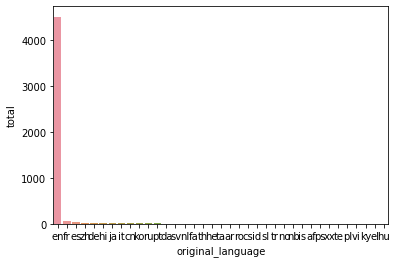

In [ ]:
#visualizando as categorias
#baixo nivel
sns.barplot(x= 'original_language', y= 'total', data = contagem_de_lingua)

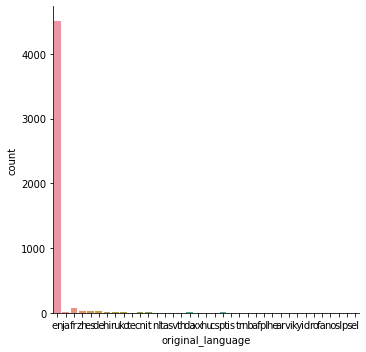

In [ ]:
#visualizando as categorias
#alto nivel
sns.catplot(x= "original_language", kind= "count", data= tmdb)

([<matplotlib.patches.Wedge at 0x7f89d51c5c18>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

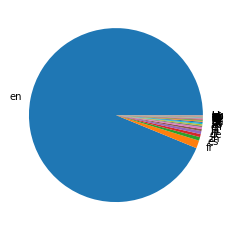

In [ ]:
#fazendo um gráfico de pizza com matplotlib
plt.pie(contagem_de_lingua["total"], labels= contagem_de_lingua["original_language"])

In [ ]:
#isolando os dados
total_por_lingua = tmdb["original_language"].value_counts()

#fazendo uma soma de tudo
total_geral = total_por_lingua.sum()

#pegando as linhas cujo o indice tenho o vaor ingles
total_de_ingles = total_por_lingua.loc["en"]

#fazendo a subtração do total menos de ingles
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
#criando um dicionario para mostrar os dados
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [ ]:
#criando um dataframe com a variavel dados
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


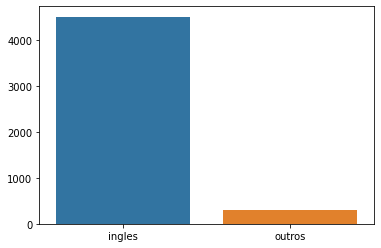

In [ ]:
#criando grafico
sns.barplot(x= 'lingua', y= 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7f89d7b07ac8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

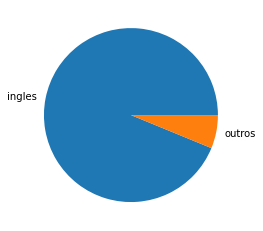

In [ ]:
#fazendo um grafico de pizza
plt.pie(dados['total'], labels= dados['lingua'])

In [ ]:
#fazendo uma pergunta para saber os filmes em ingles
tmdb.query("original_language == 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

In [ ]:
#fazendo uma pergunta para saber os filmes diferentes de  ingles
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ar     2
cs     2
ro     2
ta     2
id     2
ps     1
no     1
ky     1
vi     1
nb     1
is     1
el     1
tr     1
af     1
xx     1
te     1
pl     1
sl     1
hu     1
Name: original_language, dtype: int64

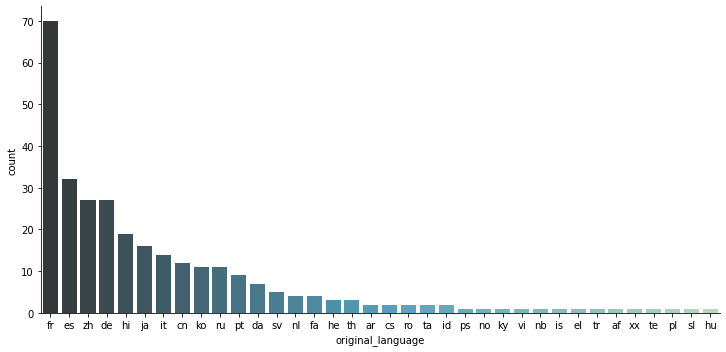

In [ ]:
#montando o grafico com os dados
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x= "original_language", 
            kind= "count", 
            data= filmes_sem_lingua_original_em_ingles, 
            aspect=2, #atributo "aspect" controla o tamanho no catplot
            palette= "GnBu_d",#atributo pallete, é a cor
            order= total_por_lingua_de_outros_filmes.index)#o atributo order controla a ordem para mostrar os dados


In [ ]:
#selecionando dois filmes 
filmes.head(2)

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
#selecionando todos os filmes
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#fazendo uma query
notas_toy_story = filmes.query("filmeid == 1")
notas_jumanji = filmes.query("filmeid == 2")
print(len(notas_toy_story), len(notas_jumanji))

1 1


In [ ]:
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f89d494c358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89d487c5c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f89d488f080>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f89d487ccc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f89d4dab5f8>,
  <matplotlib.lines.Line2D at 0x7f89d488fb00>]}

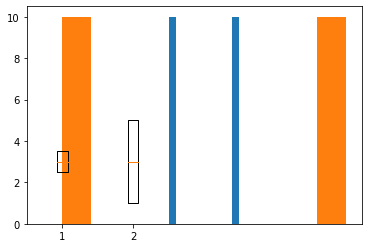

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])